<a href="https://colab.research.google.com/github/Elizabeth-Ofulue/DSML-Projects/blob/chimaobi/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Frame The Problem

### Business Context

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

### How to frame The Problem?

Looking at the business context above , the task to predict customer group for new potential customers. So this is a customer segmentation task using **Supervised Machine Learning algorithms** since the target labels are available already.

**What is Customer Segmentation?**

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

**Why Segment Customers?**

Segmentation allows marketers to better tailor their marketing efforts to various audience subsets. Those efforts can relate to both communications and product development. Specifically, segmentation helps a company:

* Create and communicate targeted marketing messages that will resonate with specific groups of customers, but not with others (who will receive messages tailored to their needs and interests, instead)
* Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment. 
* Identify ways to improve products or new product or service opportunities.
Establish better customer relationships.
* Test pricing options.
* Focus on the most profitable customers.
* Improve customer service.
* Upsell and cross-sell other products and services.

### Objectives of the project:

* Perform data analysis to gain insights pertaining the various customers segments

* Build predictive model for the dataset

* Document results

* Deploy and monitor the models 

## Get The Data

The data is available as csv file and canbe found in [kaggle](https://www.kaggle.com/kaushiksuresh147/customer-segmentation)

To read the data, import the required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/Elizabeth-Ofulue/DSML-Projects/chimaobi/CustomerSegmentation/Train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/Elizabeth-Ofulue/DSML-Projects/chimaobi/CustomerSegmentation/Test.csv')

Take a quick look at the train and test data 

In [3]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
test_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


### Variable Definition

| Variable      | Description |
| ----------- | ----------- |
| ID           | Unique ID   |
| Gender           |  Gender Of Customer            |
| Ever_Married          |  Martial atatus of the customer            |
|  Age           |   Age Of customer           |
|  Graduated           |   Is the customer a graduate?           |
|  Profession           |  Profession of the customer            |
|  Work_Experience          | Work experience in years              |
|   Spending_Score          | Spending score of the customer             |
|Family_Size |Number of famaily members for the customer(including the customer)              |
| Var_1            |  Anonymised Category for the customer            |
|  Segmentation           |(target) Customer Segment of the customer            |


## Expository Data Analysis (EDA)

Create a copy of the train data for exploration

In [5]:
df = train_df.copy()

In [6]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


get basic info pertaining columns in the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [8]:
df.shape

(8068, 11)

#### Check For Missing values 

Create a helper function that check if the data contains missing values and plots the percentage of the missing values per column

In [9]:
def plot_missing(data):
  missing_df = data.isnull().sum()[data.isnull().sum() != 0].sort_values()
  total_rows = data.shape[0]

  ax = missing_df.plot.barh()
  
  for p in ax.patches:
    x, y = p.get_x(), p.get_y()
    width, height = p.get_width(), p.get_height()
    text = '{:,.2f}%'.format((p.get_width()/total_rows)*100)
    ax.annotate(text,(width + 0.2, y+height/2))
  plt.title('BarChart Showing Columns With Missing Values')
  plt.xlabel('Missing Value count')

def check_missing(data):
  print('The dataframe contains no missing values') if data.isnull().sum().sum() == 0 else plot_missing(data)






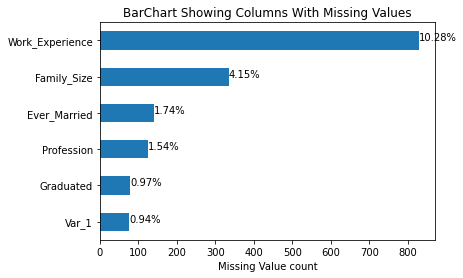

In [10]:
# call the function on the train data 
check_missing(df)

**Observation**

* The data contains 11 columns and 8068 rows
* Work Experience column has the highest number of missing values with 10.28 percent of its values missimg
* None of the columns had high number of missing values, so dropping columns would not be a good prepossing step
* Most of the columns are of object data type ie categorical in nature

### Check for duplicate rows

Its important to identify duplicate rows since it would not have any positive impact in the model but instead add noise.

For this particular dataset, No two customers should have the same customer ID, I will therefore check for uniqueness iof rows based on this column.

In [11]:
if df.shape[0] == df['ID'].nunique():
  print('The dataframe contains no duplicate rows')
else:
  print('The dataframe contains duplicate rows')
 

The dataframe contains no duplicate rows


### Univariate Analysis

This involves analysing each column in the dataframe 

Get a descriptive statistics of the numerical columns in the dataframe

In [12]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


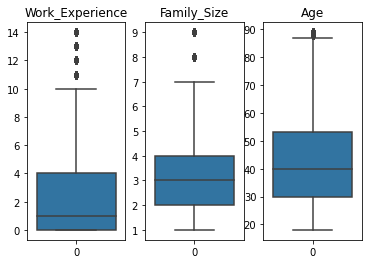

In [13]:
num_cols = [col for col in df.columns if df[col].dtype == 'float64'] + ['Age']
for i, col in enumerate(num_cols):
  plt.subplot(1,3,i+1)
  sns.boxplot(data = df[col])
  plt.title(col)

**Observation:**

The pd.DataFrame.describe() method by default returns description of numerical columns. Looking at the chart above , the numerical columns contains no outliers values since the minimum and maximum values for each column is within acceptable range of values 

Check the count distributions of the various categorical columns

In [14]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1',
 'Segmentation']

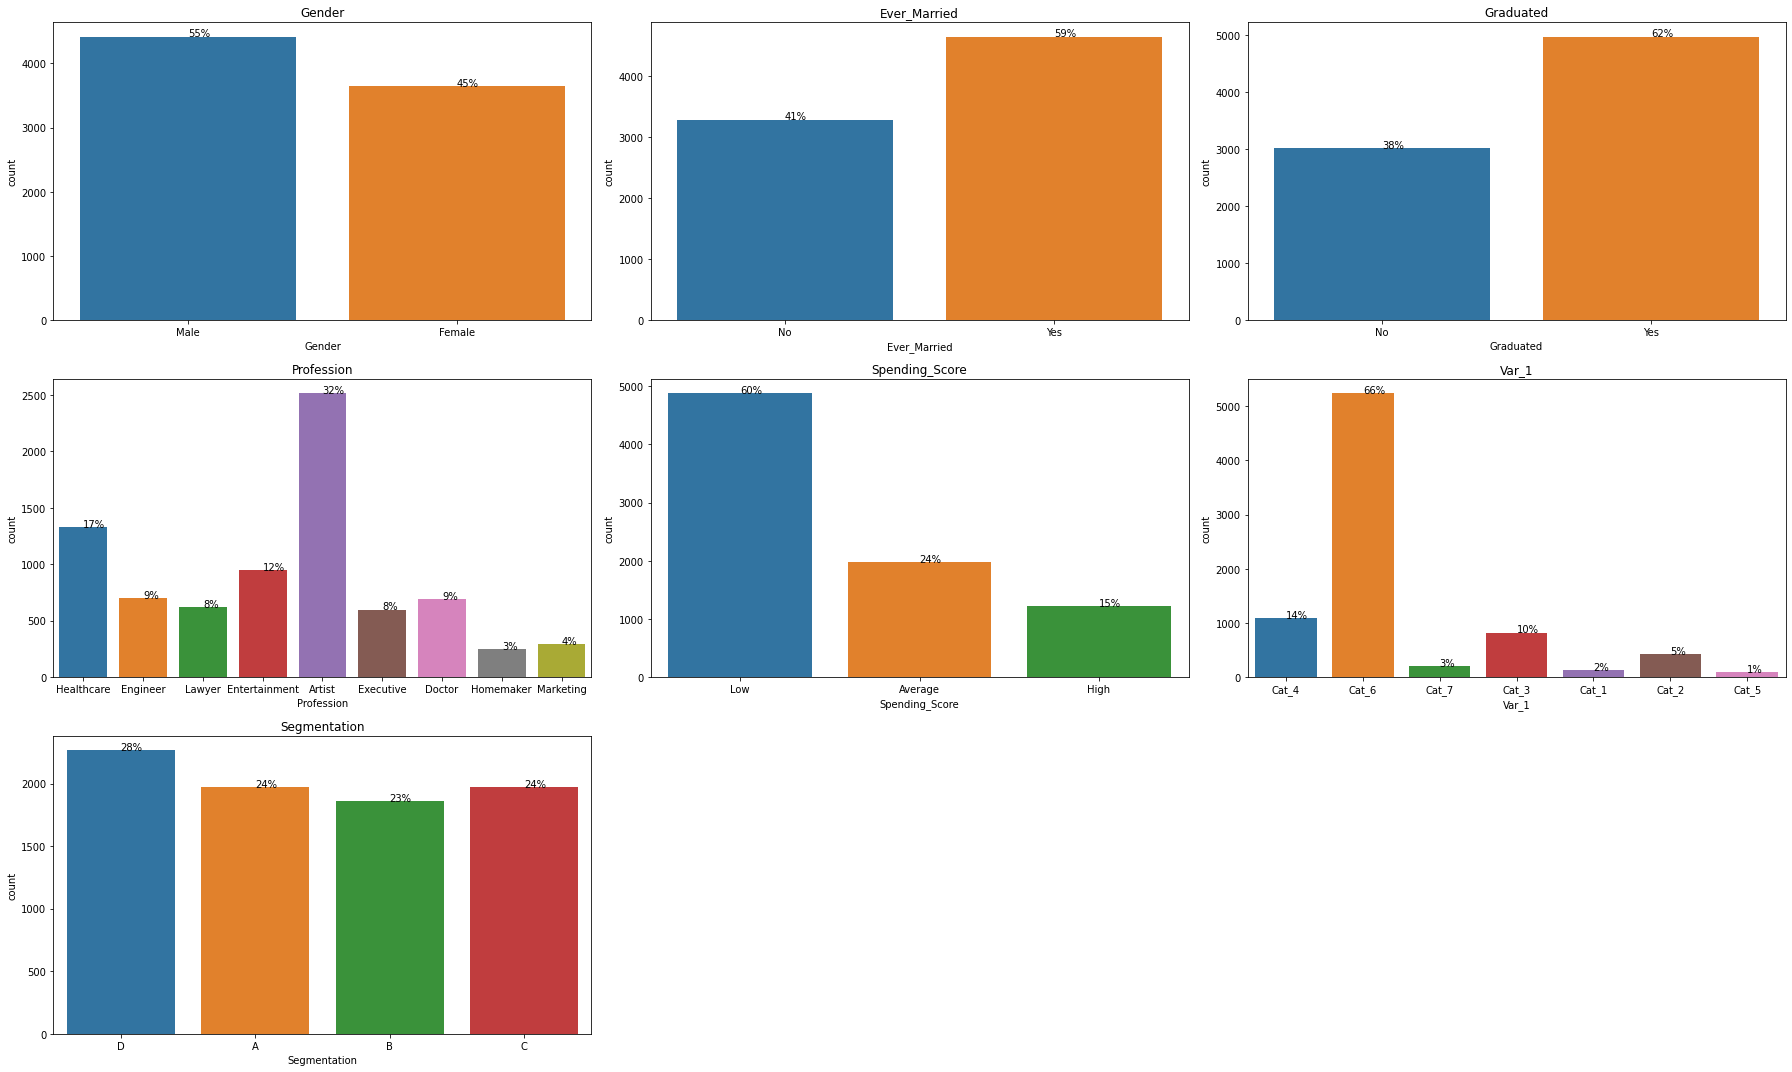

In [15]:
plt.figure(figsize = (25, 15))
for i, col in enumerate(cat_cols):
  plt.subplot(3,3,i+1)
  ax = sns.countplot(x = col, data = df)
  total = df[col].value_counts().sum()
  for p in ax.patches:
    x= p.get_x()
    height, width = p.get_height(), p.get_width()
    text = '{:,.0f}%'.format(p.get_height()/total *100)
    ax.annotate(text,(x+ width/2, height + 1))  
  plt.title(col)

plt.tight_layout()
plt.show()

**Observation:**
* 60% of the customers have a low spending score
* Most of the customers are artists
* Over 60% of the customers have graduated
* The target column segmentation has 4 categories and balanced.
* category_6 has the highest percentage of customers ( about 66%) followed by cat_4 (14%)

### Bivariate And Muiltivariate Analysis 

Bivariate Analysis : involves analysing the data to uncover relationships between two features

Muiltivariate Analysis: Involves trying to uncover relationships among more than two features

Check for correlation between Numerial Variables

In [16]:
df.corr()

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.005055,-0.030688,0.011801
Age,-0.005055,1.000000,-0.190789,-0.280517
Work_Experience,-0.030688,-0.190789,1.000000,-0.063234
Family_Size,0.011801,-0.280517,-0.063234,1.000000


Check For relationship between Spending Score and Segmentation

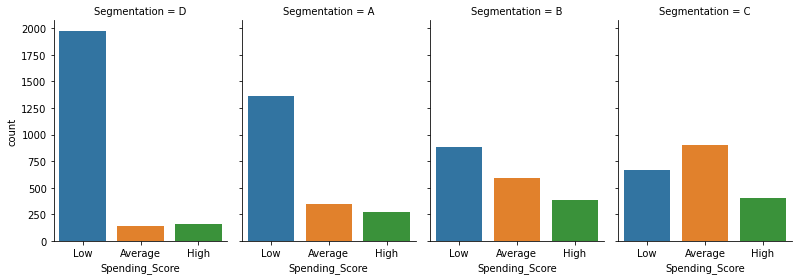

In [17]:
g = sns.catplot(x='Spending_Score',col= 'Segmentation',
                data=df, kind='count',
                height=4, aspect=.7);

**Observation:** 

Taking into consideration that over 60% of the customers are low spenders, it is worthy to note that Segment C has more average spenders while most of the low spenders are in segment D

Check for relationship between Segments and profession

<Figure size 720x2160 with 0 Axes>

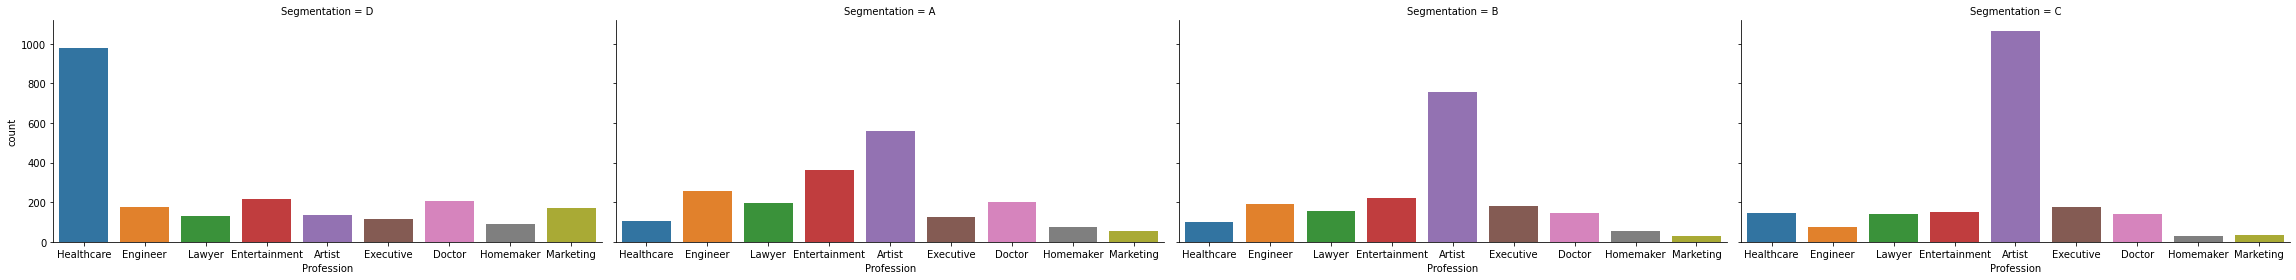

In [18]:
plt.figure(figsize=(10, 30))
sns.catplot(x='Profession',col= 'Segmentation',
                data=df, kind='count',
                height=4, aspect=2);

**Observation:** Most of the healthcare workers are in segment D. Also owing to the fact that most customers are Artists, It is worthy to note that there is a significant low number of artists in segment D. That is to say there is a low probability of finding artists in segment D

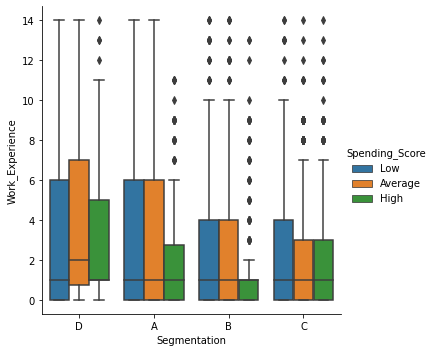

In [19]:
sns.catplot(x="Segmentation", y="Work_Experience",hue = 'Spending_Score',kind="box", data=df)

**Observation** It is significant to note from the above that generally, spending score reduces with years of experience as most high spenders have lower work-experience range compared to low and average spenders. Also segment B high_spenders using have less than 3 years of work_experience  

Check for relationship between Age And Segmentation

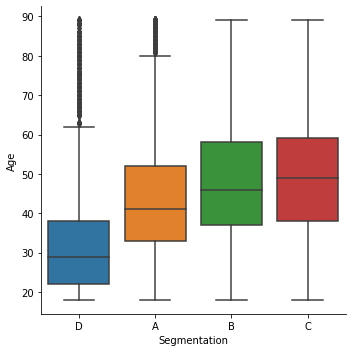

In [20]:
sns.catplot(x="Segmentation", y="Age",kind="box", data=df)

**Observation**

Segment D customers have their age distribution betweenaround 15 and 65 with few going above that. Segments B and C have an almost equal age distribution 

Lets Try visulaize the relationship(If there is) among spending_score, family_size and segmentation

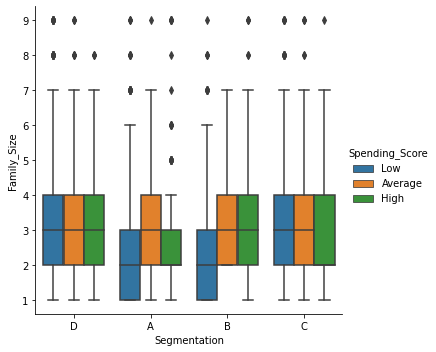

In [21]:
sns.catplot(x="Segmentation", y="Family_Size",hue = 'Spending_Score', kind="box", data=df)

**Observation**

* The family size distribution with respect to the spending score is almost identical in segments D and C, but then it canbe noted that apart from very few outliers, low spenders in segment A and B have a family size between 1 and 6, while high spenders in segment A have a family size between 1 and 4

Check for relation between the segmentations and the Anonymised Category for customers

<Figure size 720x2160 with 0 Axes>

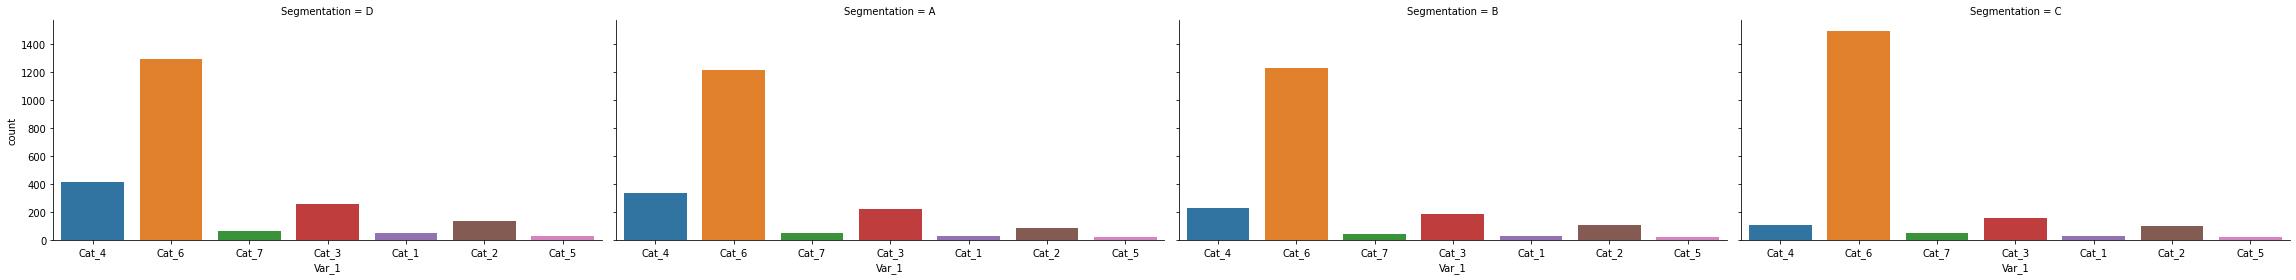

In [22]:
plt.figure(figsize=(10, 30))
sns.catplot(x='Var_1',col= 'Segmentation',
                data=df, kind='count',
                height=4, aspect=2);

**Observation** Cannot really tell much about customer segmentation based on the var_1 column

## Data Preprocessing

The performance of models will depend greatly on how the data was processed. The preprocessing steps involves adequately filling missing values, converting categorical columns to numerical types, using mutual info to select important features etc

First make of copy of test and train data fro preprocessing

In [23]:
test_prep = test_df.copy()
train_prep = train_df.copy()

Then ensure the test data comes from the same distribution as train data in terms of profession. Why this? Since profession is a categorical variable with 9 different categories, It will be a good idea to use onehot encoding. But consider a case where the train data contains 9 different professions and the test say 6, with 3 not even in the train set, what happens? Well the model will throw an error for categories that didnt exist in the train set but appears in the test set

In [24]:
test_prep['Profession'].value_counts()

Artist           802
Healthcare       418
Entertainment    301
Doctor           242
Engineer         236
Lawyer           221
Executive        176
Marketing        111
Homemaker         82
Name: Profession, dtype: int64

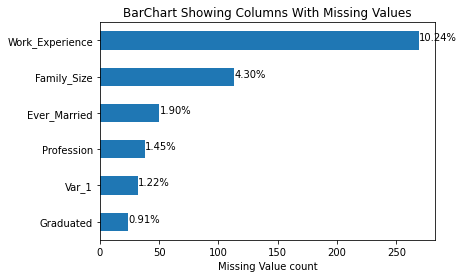

In [25]:
check_missing(test_prep)

### Preprocessing Steps

* import the necessary libraries to perform preprocessing
* Divide the train set into a features matrix and target vector
* Encode the target label to numbers 
* Fill missing values in the numerical columns with the median, this reduces the impact of the  outliers in these  columns
* Divide the feature columns into ordinal_cat, onehot_cat and num_cat and use ordinal encoding for the ordinal_cat and onehot encoding for the one_hot columns 
* Drop the customer_ID column

Create a pipeline to implement all the above steps and get a processed dataset.


In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [27]:
X_prep = train_prep.drop('Segmentation', axis= 1)
y = train_prep['Segmentation']

In [28]:
y_train = y.map({'A':1, 'B': 2, 'C':3, 'D': 4})

make 3 different arrays for ord_cat, oneot_cat and num_cat

In [29]:
num_cat = [col for col in X_prep.columns if X_prep[col].dtype == 'float64'] + ['Age']
ord_cat = ['Spending_Score']
onehot_cat = [col for col in X_prep.columns if X_prep[col].dtype == 'object' and col != 'Spending_Score']

Create onehot_pipeline that imputes missing values with mode and perform onehot encoding on it 

In [30]:
onehot_pipe = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
                        ('one_hot',OneHotEncoder(sparse=False, handle_unknown='ignore'))])

Create ord_pipeline that imputes missing values with mode and perform Ordinal encoding on it. 

In [31]:
ord_pipe = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
                        ('ord',OrdinalEncoder())])

In [32]:
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('scale', StandardScaler())])

Create a transformer that will transform the whole dataset into a form fit for modelling. Note by default the ColumnTransformer Class drops off reminder columns that are not explictly specified in the transformer steps. In this case will drop the ID column

In [33]:
full_pipe = ColumnTransformer([('num',num_pipe, num_cat),
                               ('ord', ord_pipe, ord_cat),
                               ('onehot',onehot_pipe, onehot_cat)])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [34]:
full_pipe_1 = ColumnTransformer([('num',SimpleImputer(strategy='median'), num_cat),
                               ('ord', ord_pipe, ord_cat),
                               ('onehot',onehot_pipe, onehot_cat)])

In [35]:
X_train_base = full_pipe.fit_transform(X_prep)

In [36]:
X_train = full_pipe_1.fit_transform(X_prep)

## Modelling

Before Modelling, it is worthy to note that the target variable contains 4 distinct classes, meaning the problem canbe modelled as multiclass classification. Also since the dataset is balanced, accuracy of prediction would be a good evalulation metric for the various models I would consider though I will display other evaluation metrics too.

* As usual, start by importing the necessary libribries
* create a function that validates models using cross validation

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_score

In [38]:

def validate(estimator, X, y):
  scores = cross_val_score(estimator,X, y,scoring='accuracy', cv= 5)
  return scores.mean(), scores.std()

### Build Model Using LogisticsRegression

In [39]:
log_model = LogisticRegression(random_state=42, max_iter=300)
log_model.fit(X_train_base, y_train)


LogisticRegression(max_iter=300, random_state=42)

In [40]:
#check for performance on train_data
accuracy_score(y_train, log_model.predict(X_train_base))

0.514873574615766

In [41]:
#validate log_model
validate(log_model, X_train_base ,y_train)

(0.5081799751246647, 0.00991839046662015)

#### Documentation

At first, the logistics regression model didnt converge at the default max_iter(100). Increasing the max_iter to 500 didnt help either. This is because logistic regression uses gradient descent to update weights and having some features like age with large values really slows down graident descent and makes it difficult for the algorithm to converge. 

To solve this, I had to include a num_pipe to the preprocessing step to scale the numerical columns.

**Note** I didnt plan to scale data at first since often times gradient descent converges very close to global optima without standardization, tree_based and gbm are robust high value features so scaling or not scaling wont have much impact on them

### Build Model Using DecisionTreeClassifier

In [42]:
tree_model = DecisionTreeClassifier(random_state = 14, max_depth=5)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=14)

In [43]:
accuracy_score(y_train, tree_model.predict(X_train))

0.5303668815071889

In [44]:
## validate tree model 
validate(tree_model, X_train,y_train)

(0.516113962530278, 0.003686125833030847)

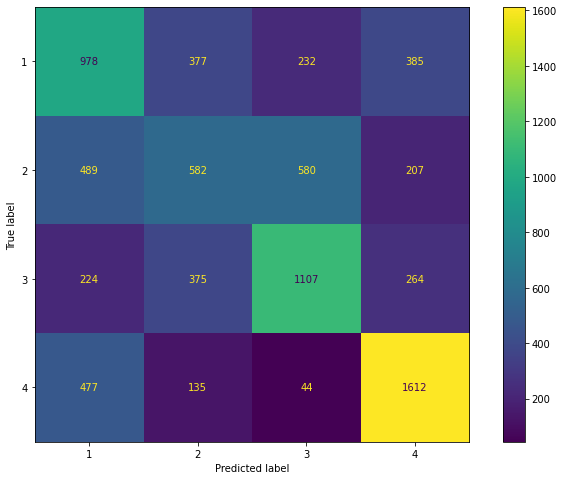

In [45]:
##Plot confusion_matrix for tree model
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_train,tree_model.predict(X_train))
cmp = ConfusionMatrixDisplay(cm, display_labels=tree_model.classes_)
cmp.plot(ax=ax)

plt.show();

### Build Model Using XGB

In [46]:
xg_model = XGBClassifier(seed = 42)
xg_model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob', seed=42)

In [47]:
accuracy_score(y_train, xg_model.predict(X_train))

0.5656916212196331

In [48]:
validate(xg_model, X_train, y_train)

(0.537307625235175, 0.01096686184235683)

## Documentation


A model that gives about 54% accuracy(dev set) on the customer segmentation task should not be deployed and therefore no need for making predictions on test set.

Having tried out different feature generations and feature transformations on a rough notebook, I would say there is no enough features/data given for the required task. 

### Recommendations
 In a business setting, I would go back to the sales team that made the initial segmentation and source more information as regrads the factors they considered while making the classifications, that way gain more insights on the next steps to take .